# Debugging bench

In [4]:
!make

make: Nothing to be done for 'all'.


In [6]:
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath("../common"))
import subprocess
import json
import py_helper

%matplotlib widget

defines=py_helper.load_defines("mat_size.hpp")

NCOLS_A = defines["NCOLS_A"]
NROWS_C = defines["NROWS_C"]
NCOLS_C = defines["NCOLS_C"]

# A is of size (NROWS_C, NCOLS_A)
# B is of size (NCOLS_A, NCOLS_C)    
# C is of size (NROWS_C, NCOLS_C)

mat_mul_double=py_helper.MatMul(NCOLS_A, NROWS_C, NCOLS_C, np.float64)
mat_mul_float=py_helper.MatMul(NCOLS_A, NROWS_C, NCOLS_C, np.float32)

# Make up objects for timing results and local optimisation
timings=py_helper.TimingResults()

Device id: 0
	name:                                    NVIDIA GeForce RTX 3060 Laptop GPU
	global memory size:                      6117 MB
	available registers per block:           65536 
	max threads per SM or CU:                1536 
	maximum shared memory size per block:    49 KB
	maximum shared memory size per SM or CU: 0 KB
	maximum pitch size for memory copies:    2147 MB
	max block size:                          (1024,1024,64)
	max threads in a block:                  1024
	max Grid size:                           (2147483647,65535,65535)
Time for kernel was 4.543 ms
Maximum error (infinity norm) is: 0.000610352


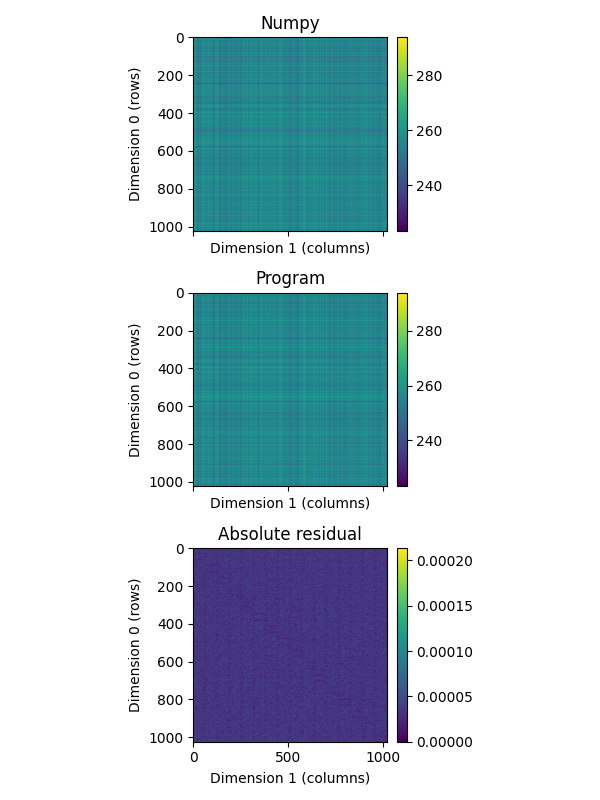

In [10]:
#local_opt=py_helper.LocalOpt(cmds=["./mat_mult_local_A.exe", "-cpu", "0"])
subprocess.run(["../install/bin/mat_mult_tile_shared_AB_vector.exe"])

mat_mul_float.load_data()
mat_mul_float.check_data()

Device id: 0
	name:                                    AMD Radeon VII
	global memory size:                      17163 MB
	available registers per block:           65536 
	maximum shared memory size per block:    65 KB
	maximum pitch size for memory copies:    2147 MB
	max block size:                          (1024,1024,1024)
	max threads in a block:                  1024
	max Grid size:                           (2147483647,2147483647,2147483647)
Kernel execution not successful, error code is: the operation cannot be performed in the present state
Kernel execution not successful, error code is: the operation cannot be performed in the present state
Time for kernel was -1.000 ms
Maximum error (infinity norm) is: 153.955


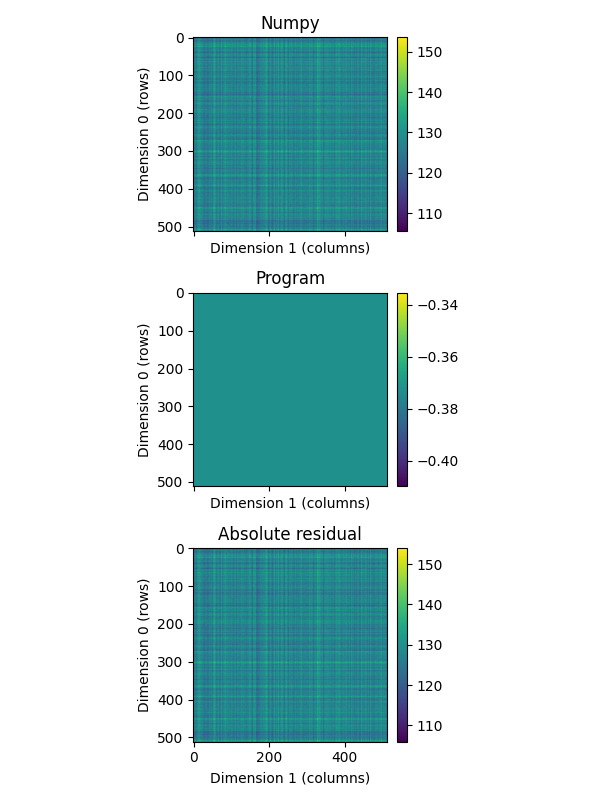

In [5]:
#local_opt=py_helper.LocalOpt(cmds=["./mat_mult_local_A.exe", "-cpu", "0"])
subprocess.run(["./mat_mult_AT.exe"])

mat_mul_float.load_data()
mat_mul_float.check_data()

Device id: 0
	name:                                    AMD Radeon VII
	global memory size:                      17163 MB
	available registers per block:           65536 
	maximum shared memory size per block:    65 KB
	maximum pitch size for memory copies:    2147 MB
	max block size:                          (1024,1024,1024)
	max threads in a block:                  1024
	max Grid size:                           (2147483647,2147483647,2147483647)
Kernel execution not successful, error code is: the operation cannot be performed in the present state
Kernel execution not successful, error code is: the operation cannot be performed in the present state
Time for kernel was -1.000 ms
Maximum error (infinity norm) is: 153.955


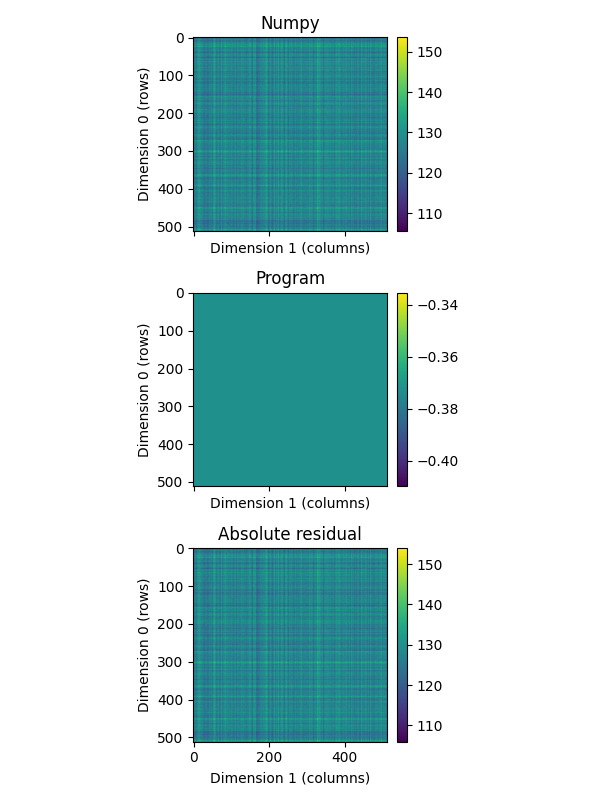

In [6]:
#local_opt=py_helper.LocalOpt(cmds=["./mat_mult_local_A.exe", "-cpu", "0"])
subprocess.run(["./mat_mult_BT.exe"])

mat_mul_float.load_data()
mat_mul_float.check_data()

In [7]:
!make

make: Nothing to be done for 'all'.


Device id: 0
	name:                                    AMD Radeon VII
	global memory size:                      17163 MB
	available registers per block:           65536 
	maximum shared memory size per block:    65 KB
	maximum pitch size for memory copies:    2147 MB
	max block size:                          (1024,1024,1024)
	max threads in a block:                  1024
	max Grid size:                           (2147483647,2147483647,2147483647)
Maximum error (infinity norm) is: 0.000183105


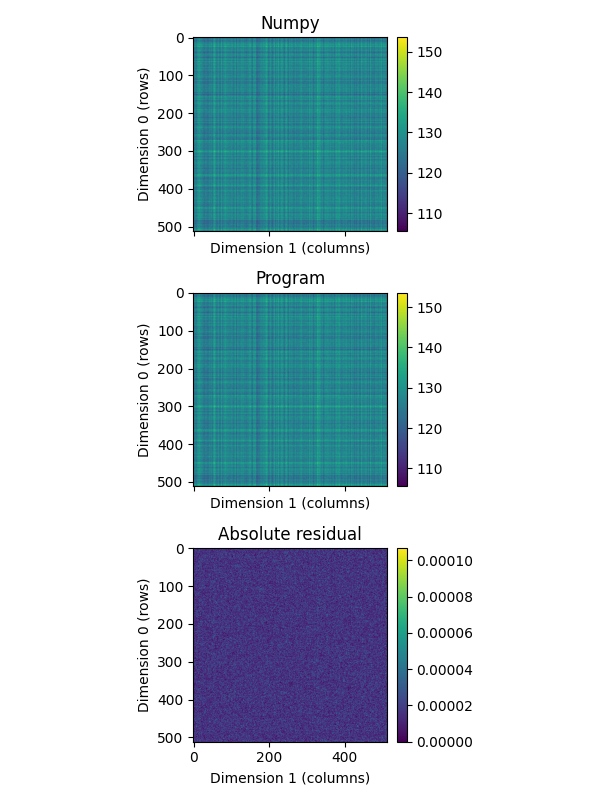

In [9]:
#local_opt=py_helper.LocalOpt(cmds=["./mat_mult_local_A.exe", "-cpu", "0"])
subprocess.run(["./mat_mult_float_md_hipblas.exe"])

mat_mul_float.load_data()
mat_mul_float.check_data()

Device id: 0
	name:                                    AMD Radeon VII
	global memory size:                      17163 MB
	available registers per block:           65536 
	maximum shared memory size per block:    65 KB
	maximum pitch size for memory copies:    2147 MB
	max block size:                          (1024,1024,1024)
	max threads in a block:                  1024
	max Grid size:                           (2147483647,2147483647,2147483647)
Time for kernel was 3.405 ms
Maximum error (infinity norm) is: 9.15527e-05


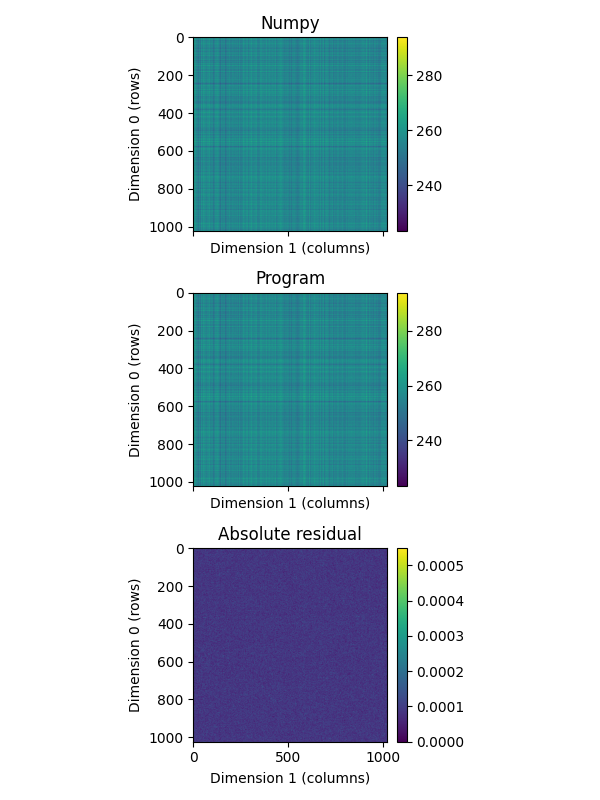

In [11]:
#local_opt=py_helper.LocalOpt(cmds=["./mat_mult_local_A.exe", "-cpu", "0"])
subprocess.run(["./mat_mult_tile_shared_A.exe"])

mat_mul_float.load_data()
mat_mul_float.check_data()